In [1]:
import pandas as pd
import numpy as np
import seaborn as sb 
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import skew
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, accuracy_score, r2_score, f1_score,\
roc_auc_score,mean_absolute_error,mean_absolute_percentage_error,max_error

In [2]:
data_fin_imprt=pd.read_csv("final.csv",  delimiter=',')


In [3]:
data_fin_imprt

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,3.044522,4.955827,10.366309,6,1.791759,7.581210,1960,4.727388,6.461468,0.000000,...,0,0,0,1,0,0,0,0,1,0
1,3.044522,4.394449,9.360741,5,1.945910,7.581720,1961,0.000000,6.150603,4.976734,...,0,0,0,1,0,0,0,0,1,0
2,3.044522,4.406719,9.565775,6,1.945910,7.580189,1958,4.691348,6.828712,0.000000,...,0,0,0,1,0,0,0,0,1,0
3,3.044522,4.543295,9.320181,7,1.791759,7.585281,1968,0.000000,6.971669,0.000000,...,0,0,0,1,0,0,0,0,1,0
4,4.110874,4.317488,9.534668,5,1.791759,7.599902,1998,0.000000,6.674561,0.000000,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,4.394449,3.637586,8.979417,6,1.945910,7.593374,1984,0.000000,6.709304,0.000000,...,0,0,0,1,0,0,0,0,1,0
2926,3.044522,4.251699,9.092232,5,1.791759,7.592870,1983,0.000000,5.710427,5.783825,...,0,0,0,1,0,0,0,0,1,0
2927,4.454347,4.143135,9.253591,5,1.791759,7.597396,1992,0.000000,5.823046,0.000000,...,0,0,0,1,0,0,0,0,1,0
2928,3.044522,4.356709,9.211440,5,1.791759,7.588324,1975,0.000000,6.977281,4.820282,...,0,0,0,1,0,0,0,0,1,0


In [4]:

x=data_fin_imprt.drop('SalePrice',axis=1)
y=data_fin_imprt['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [5]:

lin_mod=LinearRegression()
lin_mod.fit(x_train,y_train)
lin_pred = lin_mod.predict(x_test)

In [6]:
lin_mod_sc=lin_mod.score(x_train,y_train)
print('Linear Regression Model Score  : ',round(lin_mod_sc,3))
r2=r2_score(y_test,lin_pred)# computing and displaying the R.Sq of the model
print('R Sq. Value : ',round(r2,2))
lin_adj_r2 = 1 - (1-r2) * (len(y)-1)/(len(y)-x.shape[1]-1)
print('Adjusted R Sq. Value is : ', round(lin_adj_r2,3))
mean_sq=mean_squared_error(y_test,lin_pred)# computing and displaying the Mean square error of the model
print('Mean Square Error is : ', round(mean_sq,3))
lin_rmse=mean_squared_error(y_test,lin_pred,squared = False)
print('Root Mean Square Error is : ', round(lin_rmse,3))
lin_mae=mean_absolute_error(y_test, lin_pred)
print('Mean Absoulue Error is : ', round(lin_mae,3))
scores_cvs = cross_val_score(lin_mod, x, y,scoring='r2', cv=5)
print("Accuracy :",round(scores_cvs.mean()*100,2),"%")

Linear Regression Model Score  :  0.935
R Sq. Value :  0.91
Adjusted R Sq. Value is :  0.899
Mean Square Error is :  0.017
Root Mean Square Error is :  0.13
Mean Absoulue Error is :  0.075
Accuracy : 87.53 %


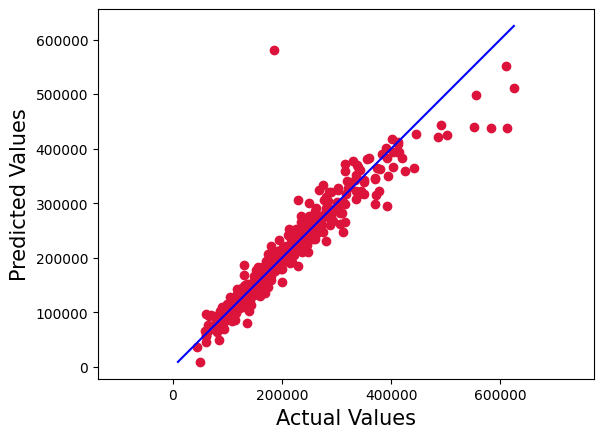

In [7]:
Actual_Price=np.expm1(y_test)
Predicted_Price=np.expm1(lin_pred)
plt.scatter(Actual_Price, Predicted_Price, c='crimson')
p1 = max(max(Predicted_Price), max(Actual_Price))
p2 = min(min(Predicted_Price), min(Actual_Price))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.axis('equal')
plt.show()

C:\Users\hites\AppData\Local\Temp\ipykernel_3468\4269673852.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot((y_test-lin_pred),bins=100);


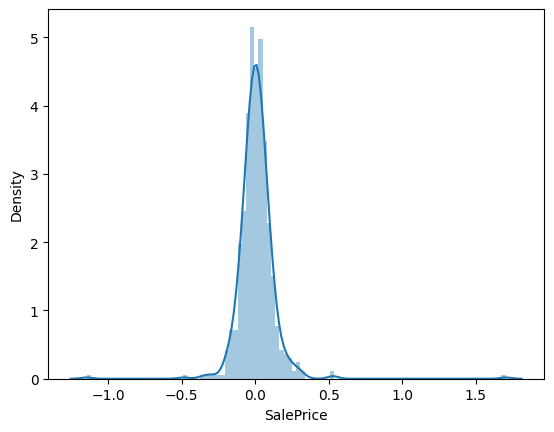

In [8]:
sb.distplot((y_test-lin_pred),bins=100); 

In [9]:
parameters ={'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

In [10]:
G_CV_lin = GridSearchCV(estimator=lin_mod, param_grid=parameters, cv= 5) #  using grid search method to optimise model with hyperparameter tuning

G_CV_lin.fit(x_train, y_train)# fitting the model
G_CV_lin.best_params_ # displaying optimised parameters for optimal tuning of model

C:\Users\hites\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\hites\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pi

{'copy_X': True, 'fit_intercept': True, 'normalize': False}

'copy_X': True, 'fit_intercept': True, 'normalize': False

In [11]:
lin_mod=LinearRegression(copy_X= True, fit_intercept= True, normalize= False)
lin_mod.fit(x_train,y_train)
lin_pred = lin_mod.predict(x_test)

C:\Users\hites\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


In [12]:
lin_mod_sc=lin_mod.score(x_train,y_train)#best '1'
print('Linear Regression Model Score  : ',round(lin_mod_sc,3))
r2=r2_score(y_test,lin_pred)# computing and displaying the R.Sq of the model, best 'above0.9'
print('R Sq. Value : ',round(r2,2))
lin_adj_r2 = 1 - (1-r2) * (len(y)-1)/(len(y)-x.shape[1]-1)#0.8+
print('Adjusted R Sq. Value is : ', round(lin_adj_r2,3))
mean_sq=mean_squared_error(y_test,lin_pred)# computing and displaying the Mean square error of the model, best 0
print('Mean Square Error is : ', round(mean_sq,3))
lin_rmse=mean_squared_error(y_test,lin_pred,squared = False)#best 0
print('Root Mean Square Error is : ', round(lin_rmse,3))
lin_mae=mean_absolute_error(y_test, lin_pred)#best 0
print('Mean Absoulue Error is : ', round(lin_mae,3))
scores_cvs = cross_val_score(lin_mod, x, y,scoring='r2', cv=5) #best 100
print("Accuracy :",round(scores_cvs.mean()*100,2),"%") # Accuracy of moadel based on parameter supplied by GridsearchCV

C:\Users\hites\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\hites\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\hites\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was d

Linear Regression Model Score  :  0.935
R Sq. Value :  0.91
Adjusted R Sq. Value is :  0.899
Mean Square Error is :  0.017
Root Mean Square Error is :  0.13
Mean Absoulue Error is :  0.075


C:\Users\hites\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


Accuracy : 87.53 %


C:\Users\hites\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


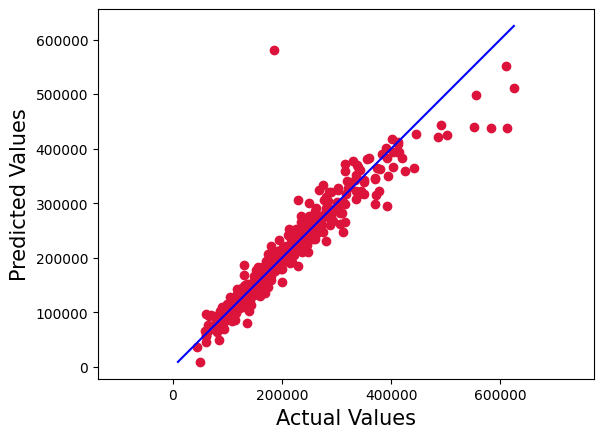

In [13]:
Actual_Price=np.expm1(y_test)
Predicted_Price=np.expm1(lin_pred)
plt.scatter(Actual_Price, Predicted_Price, c='crimson')
p1 = max(max(Predicted_Price), max(Actual_Price))
p2 = min(min(Predicted_Price), min(Actual_Price))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.axis('equal')
plt.show()

C:\Users\hites\AppData\Local\Temp\ipykernel_3468\4269673852.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot((y_test-lin_pred),bins=100);


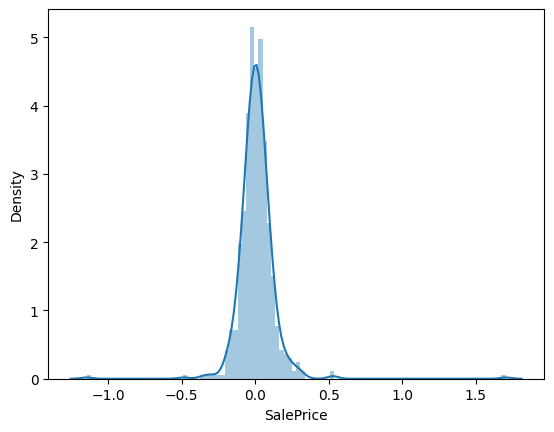

In [14]:
sb.distplot((y_test-lin_pred),bins=100); 